In [2]:
import numpy as np
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_can = pd.read_excel('data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)

In [5]:
years = list(range(1980, 2014))

In [6]:
df_CI = df_can.loc[['China', 'India'], years]

In [7]:
df_CI_wide = df_CI.T

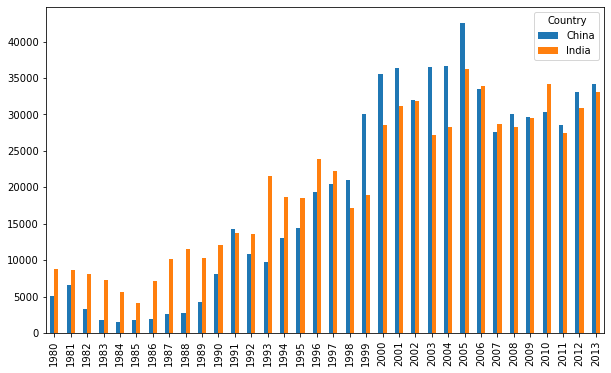

In [8]:
df_CI_wide.plot(kind='bar', figsize=(10, 6))

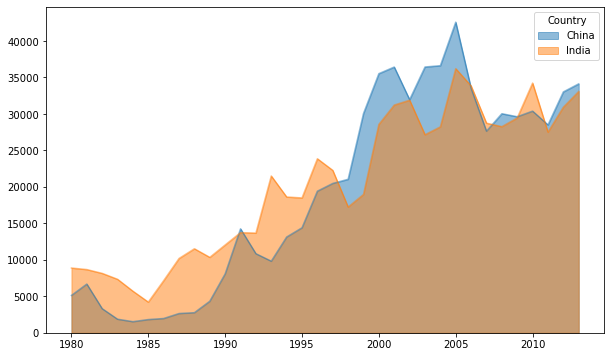

In [9]:
df_CI_wide.plot(kind='area', stacked=False, figsize=(10, 6))

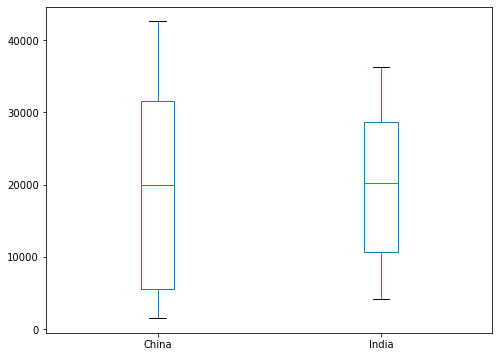

In [10]:
df_CI_wide.plot(kind='box', figsize=(8, 6))

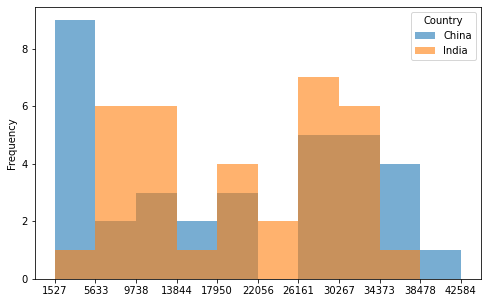

In [11]:
count, bin_edges = np.histogram(df_CI_wide)

df_CI_wide.plot(kind='hist', figsize=(8, 5), xticks=bin_edges, alpha=0.6)

In [12]:
df_CI_wide.plot(kind='scatter')

ValueError: scatter requires an x and y column

In [13]:
df_CI_long = df_CI_wide.reset_index().rename(columns={'index':'Year'}).melt(id_vars='Year', var_name='Country', value_name='Immigrants')

In [14]:
df_CI_long.head()

,Year,Country,Immigrants
0,1980,China,5123
1,1981,China,6682
2,1982,China,3308
3,1983,China,1863
4,1984,China,1527


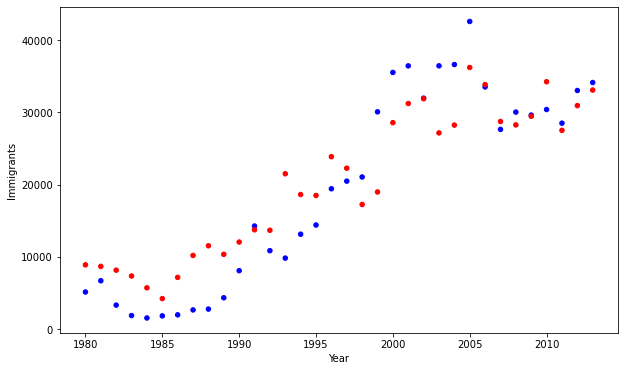

In [15]:
df_CI_long['Country']=pd.Categorical(df_CI_long['Country'])

col = df_CI_long['Country'].cat.codes.map({0:'b', 1:'r'})
df_CI_long.plot(kind='scatter', x='Year', y='Immigrants', figsize=(10, 6), c=col)

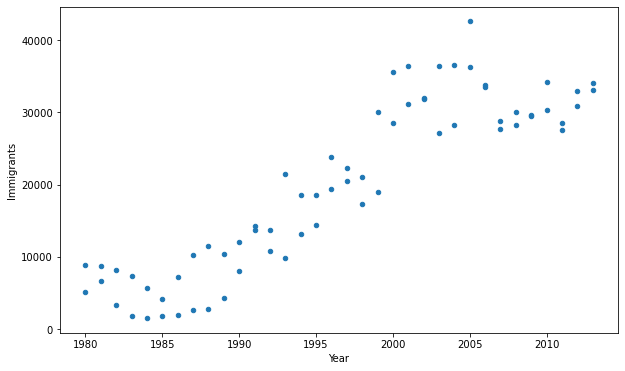

In [17]:
df_CI_long.plot(kind='scatter', x='Year', y='Immigrants', figsize=(10, 6))